In [3]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

# Load preprocessed Dataset

In [4]:
injury_df = pd.read_pickle("Data/injury_descriptions_processed.pkl")
injury_new_df = injury_df[
    ~injury_df.InjuryCauseDesc.str.contains("Bodily reaction and exertion, unspecified")]
injuryDataFrame = injury_df[~injury_df.InjuryCauseDesc.str.contains("Bodily reaction, n.e.c.")]

injury_new_df.reset_index(inplace=True)
injury_new_df.drop(['index','label'], axis=1,inplace=True)

le = LabelEncoder()
label = le.fit_transform(injury_new_df.InjuryCauseDesc)
injury_new_df['label']=label

/var/folders/gy/hjflsmyx53jch_h0701bpwdc0000gn/T/ipykernel_63917/2651487592.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury_new_df.drop(['index','label'], axis=1,inplace=True)
/var/folders/gy/hjflsmyx53jch_h0701bpwdc0000gn/T/ipykernel_63917/2651487592.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injury_new_df['label']=label


In [62]:
# splitting classes for experimentation
data = injury_new_df
X0 = data[data.label == 0]
X1 = data[data.label == 1]
X2 = data[data.label == 2]
X3 = data[data.label == 3]
X4 = data[data.label == 4]
X5 = data[data.label == 5]
X6 = data[data.label == 6]
X7 = data[data.label == 7]
X8 = data[data.label == 8]
X9 = data[data.label == 9]
X10 = data[data.label == 10]
X11 = data[data.label == 11]

X3_ds = X3.sample(n=10000)
X4_ds = X4.sample(n=10000)
X2_ds = X2.sample(n=10000)

x8_s = X8.sample(n=(10000-len(X9)))
x5_s = X5.sample(n=(8000-len(X1)))
x10_s = X10.sample(n=(8000-len(X6)))


# tokenize

In [5]:
def token_process_split(data_local):
    vectorizer = TfidfVectorizer(max_features=4000, decode_error="ignore",ngram_range=(1,2))
    Xvec = vectorizer.fit_transform(data_local.InjuryDesc)
    y = data_local.label
    
    x_train,x_test,y_train,y_test = train_test_split(Xvec,y,test_size=0.2,random_state=42)
    
    return x_train,x_test,y_train,y_test

In [6]:
x_train_w,x_test_w,y_train_w,y_test_w = token_process_split(injury_new_df)
x_train_w,x_test_w,y_train_w,y_test_w

(<75552x4000 sparse matrix of type '<class 'numpy.float64'>'
 	with 1055770 stored elements in Compressed Sparse Row format>,
 <18888x4000 sparse matrix of type '<class 'numpy.float64'>'
 	with 262210 stored elements in Compressed Sparse Row format>,
 86020     9
 1409      8
 88986     3
 56629     4
 36873     3
          ..
 6265      0
 54886    11
 76820     2
 860       2
 15795     8
 Name: label, Length: 75552, dtype: int64,
 78450    8
 34191    0
 58492    2
 60737    2
 83327    3
         ..
 30661    3
 58290    6
 55066    2
 80358    6
 21338    3
 Name: label, Length: 18888, dtype: int64)

## Using - Random forest on whole dataset

In [7]:
rfc2=RandomForestClassifier(random_state=161, max_depth=20,max_features=150)


In [8]:
rfc2.fit(x_train_w,y_train_w)

RandomForestClassifier(max_depth=20, max_features=150, random_state=161)

In [9]:
pred=rfc2.predict(x_test_w)
train_pred = rfc2.predict(x_train_w)

In [10]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test_w,pred))
print("Accuracy Random Forest on CV ,training : ",accuracy_score(y_train_w,train_pred))

Accuracy for Random Forest on CV data:  0.6290766624311732
Accuracy Random Forest on CV ,training :  0.6759847522236341


In [11]:
print(classification_report(y_test_w,pred))

              precision    recall  f1-score   support

           0       0.70      0.30      0.42      1104
           1       0.62      0.03      0.05       903
           2       0.50      0.78      0.60      2722
           3       0.67      0.91      0.77      3166
           4       0.58      0.90      0.71      2937
           5       0.75      0.44      0.55      1188
           6       0.75      0.58      0.65      1037
           7       0.84      0.92      0.88       779
           8       0.64      0.47      0.54      1772
           9       0.69      0.32      0.44      1051
          10       0.86      0.41      0.55      1192
          11       0.69      0.40      0.51      1037

    accuracy                           0.63     18888
   macro avg       0.69      0.54      0.56     18888
weighted avg       0.66      0.63      0.60     18888



>15, train: 0.622, test: 0.597
>16, train: 0.636, test: 0.607
>17, train: 0.640, test: 0.606
>18, train: 0.656, test: 0.614
>19, train: 0.668, test: 0.622
>20, train: 0.669, test: 0.623
>21, train: 0.683, test: 0.631
>22, train: 0.692, test: 0.635
>23, train: 0.700, test: 0.635
>24, train: 0.710, test: 0.644


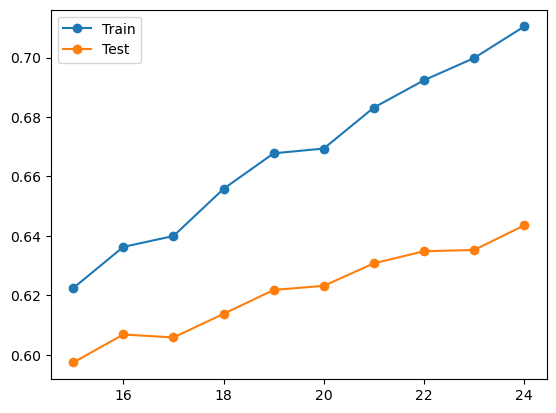

In [12]:
from matplotlib import pyplot

train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(15, 25)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
    model = RandomForestClassifier(max_depth=i,max_features=150)
 # fit model on the training dataset
    model.fit(x_train_w, y_train_w)
 # evaluate on the train dataset
    train_yhat = model.predict(x_train_w)
    train_acc = accuracy_score(y_train_w, train_yhat)
    train_scores.append(train_acc)
 # evaluate on the test dataset
    test_yhat = model.predict(x_test_w)
    test_acc = accuracy_score(y_test_w, test_yhat)
    test_scores.append(test_acc) # summarize progress
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

## Random forest decision tree top 3 classes

In [45]:

data_lrg = pd.concat([X2,X3,X4])
x_train,x_test,y_train,y_test = token_process_split(data_lrg)
x_train,x_test,y_train,y_test

(<35132x4000 sparse matrix of type '<class 'numpy.float64'>'
 	with 505217 stored elements in Compressed Sparse Row format>,
 <8783x4000 sparse matrix of type '<class 'numpy.float64'>'
 	with 127076 stored elements in Compressed Sparse Row format>,
 46258    3
 78711    3
 89287    2
 8910     4
 90089    3
         ..
 43143    2
 74484    2
 53972    4
 8117     2
 24361    3
 Name: label, Length: 35132, dtype: int64,
 25983    3
 36207    2
 18033    4
 82708    3
 8458     3
         ..
 234      4
 43768    3
 51769    3
 51986    4
 71262    3
 Name: label, Length: 8783, dtype: int64)

In [46]:
rm_clf = RandomForestClassifier(max_depth=10, random_state=42)

In [47]:
rm_clf.fit(x_train,y_train) 

RandomForestClassifier(max_depth=10, random_state=42)

In [48]:
y_pred_rm = rm_clf.predict(x_test)
accuracy_score(y_test, y_pred_rm)

0.9320277809404531

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [10,20,50,80],
    'criterion' :['gini', 'entropy']
}

# Create a based model
rfc = RandomForestClassifier()

# Instantiate the grid search model
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, verbose = 2)

# halving_cv = HalvingGridSearchCV(rf, param_grid,random_state=42)

CV_rfc.fit(x_train, y_train)

In [49]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=80, criterion='gini')

In [50]:
rfc1.fit(x_train, y_train)

RandomForestClassifier(max_depth=80, n_estimators=200, random_state=42)

In [51]:
pred=rfc1.predict(x_test)

In [52]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

print(classification_report(y_test, pred))

Accuracy for Random Forest on CV data:  0.9560514630536263
              precision    recall  f1-score   support

           2       0.96      0.93      0.94      2704
           3       0.95      0.97      0.96      3125
           4       0.96      0.96      0.96      2954

    accuracy                           0.96      8783
   macro avg       0.96      0.95      0.96      8783
weighted avg       0.96      0.96      0.96      8783



In [53]:
train_pred=rfc1.predict(x_train)
print("Accuracy traininh: ",accuracy_score(y_train,train_pred))


Accuracy traininh:  0.9941363998633724


## Bracket 1 and 2 - 6 classes¶

In [63]:
data_lrg2 = pd.concat([X3_ds,X4_ds,X2_ds,X8,X5,X10,x8_s,x5_s,x10_s])

In [64]:
x_train2,x_test2,y_train2,y_test2 = token_process_split(data_lrg2)

In [65]:
rfc_2 = RandomForestClassifier(random_state=161, max_depth=20)
rfc_2.fit(x_train2, y_train2)

RandomForestClassifier(max_depth=20, random_state=161)

In [66]:
pred2=rfc_2.predict(x_test2)
train_pred2 = rfc_2.predict(x_train2)

In [67]:
print("Accuracy testing Random Forest: ",accuracy_score(y_test2,pred2))
print("Accuracy training: ",accuracy_score(y_train2,train_pred2))
print(classification_report(y_test2,pred2))

Accuracy testing Random Forest:  0.7533522958147094
Accuracy training:  0.804742263851921
              precision    recall  f1-score   support

           2       0.72      0.85      0.78      1941
           3       0.73      0.61      0.67      2000
           4       0.81      0.80      0.80      1975
           5       0.82      0.71      0.76      1890
           8       0.69      0.81      0.75      2801
          10       0.83      0.71      0.77      1698

    accuracy                           0.75     12305
   macro avg       0.77      0.75      0.75     12305
weighted avg       0.76      0.75      0.75     12305



In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV


param_grid = { 
    'max_depth' : [10,20,30,40],
    'criterion' :['gini', 'entropy']
}

# Create a based model
rfc = RandomForestClassifier()

# Instantiate the grid search model
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3, verbose = 2)

# halving_cv = HalvingGridSearchCV(rf, param_grid,random_state=42)

CV_rfc.fit(x_train2, y_train2)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .......................criterion=gini, max_depth=10; total time=   1.3s
[CV] END .......................criterion=gini, max_depth=10; total time=   1.2s
[CV] END .......................criterion=gini, max_depth=10; total time=   1.2s
[CV] END .......................criterion=gini, max_depth=20; total time=   2.5s
[CV] END .......................criterion=gini, max_depth=20; total time=   2.7s
[CV] END .......................criterion=gini, max_depth=20; total time=   2.6s
[CV] END .......................criterion=gini, max_depth=30; total time=   5.4s
[CV] END .......................criterion=gini, max_depth=30; total time=   5.1s
[CV] END .......................criterion=gini, max_depth=30; total time=   5.3s
[CV] END .......................criterion=gini, max_depth=40; total time=   8.2s
[CV] END .......................criterion=gini, max_depth=40; total time=   8.2s
[CV] END .......................criterion=gini, m

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30, 40]},
             verbose=2)

In [71]:
rfc_2cv = RandomForestClassifier(random_state=42,criterion= CV_rfc.best_params_['criterion'], max_depth= CV_rfc.best_params_['max_depth'])
rfc_2cv.fit(x_train2, y_train2)



RandomForestClassifier(max_depth=40, random_state=42)

In [72]:
pred2=rfc_2cv.predict(x_test2)
train_pred2 = rfc_2cv.predict(x_train2)

In [74]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test2,pred2))
print("Accuracy training: ",accuracy_score(y_train2,train_pred2))

print(classification_report(y_test2,pred2))


Accuracy for Random Forest on CV data:  0.8073953677366924
Accuracy training:  0.9147042688501941
              precision    recall  f1-score   support

           2       0.79      0.85      0.82      1941
           3       0.80      0.67      0.73      2000
           4       0.85      0.84      0.84      1975
           5       0.83      0.81      0.82      1890
           8       0.77      0.85      0.81      2801
          10       0.83      0.82      0.83      1698

    accuracy                           0.81     12305
   macro avg       0.81      0.81      0.81     12305
weighted avg       0.81      0.81      0.81     12305

